# Decision Boundary for Naive Bayes

TODOS:

1. See Sebastian's analytical solution for the decision boundary for Naive Bayes
2. See how we can make more sense on the decision boundary and interpretation of contour plots on it.
3. Use codes from `src/utils/decision_boundary.py` to plot the decision boundary for Naive Bayes.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import sys
from pathlib import Path
parent_dir = str(Path().resolve().parents[3])
print(parent_dir)
sys.path.append(parent_dir)

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap
from src.generative.naive_bayes.naive_bayes import NaiveBayesGaussian
from src.generative.naive_bayes.config import NaivesBayesHyperparams
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs, make_classification
from src.fundamentals.decision_boundary.decision_boundary import plot_decision_regions

/Users/gaohn/gao/gaohn-probability-stats


In [5]:
np.random.seed(42)

/var/folders/sf/x4vl5wys1w1_pvy5ts9vxc640000gp/T/ipykernel_20468/3052314607.py:6: RuntimeWarning: invalid value encountered in sqrt
  return 4 - np.sqrt(-x_1**2 + 4*x_1 + 6 + np.log(16))


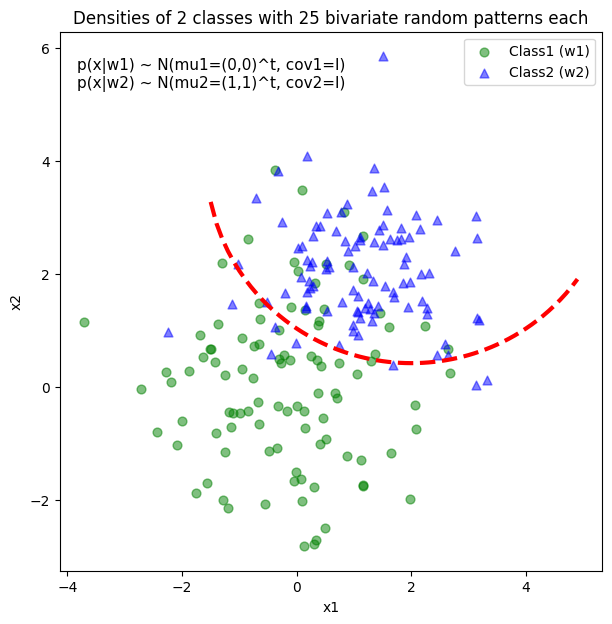

In [6]:
import numpy as np
from matplotlib import pyplot as plt

def decision_boundary(x_1):
    """ Calculates the x_2 value for plotting the decision boundary."""
    return 4 - np.sqrt(-x_1**2 + 4*x_1 + 6 + np.log(16))

# Generating a Gaussion dataset:
# creating random vectors from the multivariate normal distribution 
# given mean and covariance 
mu_vec1 = np.array([0,0])
cov_mat1 = np.array([[2,0],[0,2]])
x1_samples = np.random.multivariate_normal(mu_vec1, cov_mat1, 100)
mu_vec1 = mu_vec1.reshape(1,2).T # to 1-col vector

mu_vec2 = np.array([1,2])
cov_mat2 = np.array([[1,0],[0,1]])
x2_samples = np.random.multivariate_normal(mu_vec2, cov_mat2, 100)
mu_vec2 = mu_vec2.reshape(1,2).T # to 1-col vector

# Main scatter plot and plot annotation
f, ax = plt.subplots(figsize=(7, 7))
ax.scatter(x1_samples[:,0], x1_samples[:,1], marker='o', color='green', s=40, alpha=0.5)
ax.scatter(x2_samples[:,0], x2_samples[:,1], marker='^', color='blue', s=40, alpha=0.5)
plt.legend(['Class1 (w1)', 'Class2 (w2)'], loc='upper right') 
plt.title('Densities of 2 classes with 25 bivariate random patterns each')
plt.ylabel('x2')
plt.xlabel('x1')
ftext = 'p(x|w1) ~ N(mu1=(0,0)^t, cov1=I)\np(x|w2) ~ N(mu2=(1,1)^t, cov2=I)'
plt.figtext(.15,.8, ftext, fontsize=11, ha='left')

# Adding decision boundary to plot
x_1 = np.arange(-5, 5, 0.1)
bound = decision_boundary(x_1)
plt.plot(x_1, bound, 'r--', lw=3)

x_vec = np.linspace(*ax.get_xlim())
x_1 = np.arange(0, 100, 0.05)

plt.show()